INSTALLING MATPLOTLIB AND IMPORTING GEOPANDAS

In [57]:
import matplotlib

In [58]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


In [60]:
## Connect to the sqlite database where the crime data table exists in order to run SQLalchemy
CREATE TABLE NYPD__Complaint_Data (
	CMPLNT_NUM INTEGER,
	ADDR_PCT_CD INTEGER,
	BORO_NM TEXT,
	CMPLNT_FR_DT TEXT,
	CMPLNT_FR_TM TEXT,
	CMPLNT_TO_DT TEXT,
	CMPLNT_TO_TM TEXT,
	CRM_ATPT_CPTD_CD TEXT,
	HADEVELOPT TEXT,
	JURIS_DESC TEXT,
	KY_CD INTEGER,
	LAW_CAT_CD TEXT,
	LOC_OF_OCCUR_DESC TEXT,
	OFNS_DESC TEXT,
	PARKS_NM TEXT,
	PD_CD FLOAT,
	PD_DESC TEXT
	PREM_TYP_DESC TEXT,
	RPT_DT TEXT,
	Lat_Lon TEXT,
	X_COORD_CD INTEGER,
	Y_COORD_CD INTEGER,
	Latitude FLOAT,
	Longitude FLOAT,
	PRIMARY KEY (CMPLNT_NUM, ADDR_PCT_CD)
	);


SyntaxError: invalid syntax (<ipython-input-60-5a547f9c95eb>, line 2)

In [61]:
# Import the CSV into the nyc_crime_data.db
.mode csv
.import NYPD_Complaint_Map__Year_to_Date_.csv NYPD__Complaint_Data

SyntaxError: invalid syntax (<ipython-input-61-dc4403e52e10>, line 2)

In [62]:
# Access the nyc_crime_data via SQLalchemy

from sqlalchemy import create_engine
import pandas as pd

engine = create_engine("sqlite:///nyc_crime_data.db")
all_data = pd.read_sql('SELECT * FROM nyc_crime_data;', engine)

STEP 2: IMPORT AND READ THE NYPD (http://jonathansoma.com/lede/foundations-2017/classes/geopandas/mapping-with-geopandas/

In [63]:
## Tell python to display all columns 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [64]:
## Tell python to read the csv 
df = pd.read_csv("NYPD_Complaint_Map__Year_to_Date_.csv")

In [65]:
## Importing a toolbox so I can extend the number of rows visible in the head() output
from functools import partialmethod

In [66]:
## Extending the number of rows visible in the head() output
## pd.DataFrame.head = partialmethod(pd.DataFrame.head, n=100)
pd.DataFrame.tail = partialmethod(pd.DataFrame.tail, n=100)
df.tail()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PARKS_NM,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,Lat_Lon,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
413312,994630029,75,BROOKLYN,01/04/2020,16:00:00,01/04/2020,16:20:00,COMPLETED,NaN,N.Y. POLICE DEPT,344,MISDEMEANOR,INSIDE,ASSAULT 3 & RELATED OFFENSES,NaN,101.0,ASSAULT 3,RESIDENCE - APT. HOUSE,01/05/2020,POINT (-73.88169405099995 40.64584968500003),1017081,174596,40.645850,-73.881694
413313,402684606,48,BRONX,01/02/2020,09:00:00,01/02/2020,09:15:00,COMPLETED,NaN,N.Y. POLICE DEPT,361,MISDEMEANOR,FRONT OF,OFF. AGNST PUB ORD SENSBLTY &,NaN,661.0,"LEWDNESS,PUBLIC",STREET,01/02/2020,POINT (-73.87460525799997 40.83985775000008),1018947,245282,40.839858,-73.874605
413314,983062564,75,BROOKLYN,01/05/2020,11:00:00,01/05/2020,15:15:00,COMPLETED,NaN,N.Y. POLICE DEPT,341,MISDEMEANOR,NaN,PETIT LARCENY,NaN,321.0,"LARCENY,PETIT FROM AUTO",STREET,01/05/2020,POINT (-73.90247681199997 40.67707186200005),1011301,185964,40.677072,-73.902477
413315,402753333,84,BROOKLYN,01/02/2020,09:20:00,01/02/2020,09:25:00,COMPLETED,NaN,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,NaN,333.0,"LARCENY,PETIT FROM STORE-SHOPL",DEPARTMENT STORE,01/02/2020,POINT (-73.98345727099996 40.691011529000036),988838,191028,40.691012,-73.983457
413316,399686056,34,MANHATTAN,01/04/2020,04:08:00,01/04/2020,04:10:00,COMPLETED,NaN,N.Y. POLICE DEPT,121,FELONY,FRONT OF,CRIMINAL MISCHIEF & RELATED OF,NaN,269.0,"MISCHIEF,CRIMINAL, UNCL 2ND",BANK,01/04/2020,POINT (-73.92631700699997 40.86405852200004),1004631,254083,40.864059,-73.926317
413317,184136298,75,BROOKLYN,01/02/2020,17:30:00,01/02/2020,17:35:00,COMPLETED,NaN,N.Y. POLICE DEPT,105,FELONY,FRONT OF,ROBBERY,NaN,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",STREET,01/02/2020,POINT (-73.87366566299994 40.66473624300004),1019299,181480,40.664736,-73.873666
413318,868886972,83,BROOKLYN,01/05/2020,17:35:00,01/05/2020,17:40:00,COMPLETED,NaN,N.Y. POLICE DEPT,578,VIOLATION,FRONT OF,HARRASSMENT 2,NaN,638.0,"HARASSMENT,SUBD 3,4,5",STREET,01/05/2020,POINT (-73.91102395399997 40.69120065000004),1008925,191109,40.691201,-73.911024
413319,374404190,6,MANHATTAN,01/01/2020,02:43:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,347,MISDEMEANOR,NaN,INTOXICATED & IMPAIRED DRIVING,NaN,905.0,"INTOXICATED DRIVING,ALCOHOL",STREET,01/01/2020,POINT (-74.00536753999995 40.74095351900007),982763,209223,40.740954,-74.005368
413320,768532892,70,BROOKLYN,12/29/2019,15:45:00,12/29/2019,16:00:00,COMPLETED,NaN,N.Y. POLICE DEPT,578,VIOLATION,INSIDE,HARRASSMENT 2,NaN,638.0,"HARASSMENT,SUBD 3,4,5",RESIDENCE-HOUSE,01/02/2020,POINT (-73.92115308499997 40.633312379000074),1006135,170016,40.633312,-73.921153
413321,525580340,41,BRONX,11/12/2019,18:28:00,11/12/2019,18:47:00,COMPLETED,NaN,N.Y. POLICE DEPT,114,FELONY,INSIDE,ARSON,NaN,263.0,"ARSON 2,3,4",RESIDENCE - APT. HOUSE,01/06/2020,POINT (-73.89033032599998 40.82208252700008),1014604,238800,40.822083,-73.890330


In [67]:
## Check out the count of crimes that are listed as occurring OUTSIDE and FRONT OF
query = 'Select Count(*) from nyc_crime_data where LOC_OF_OCCUR_DESC in ("OUTSIDE", "FRONT OF")'
outdoor_crimes_count = pd.read_sql(query, engine)



In [68]:
outdoor_crimes_count

,Count(*)
0,111995


In [69]:

## I'm interested in crimes that occurred outside, not inside. So I will use SQLalchemy to filter all crimes. 
## I want to keep rows that under the column LOC_OF_OCCUR_DESC that contain "OUTSIDE" or "FRONT OF"


query = 'Select * from nyc_crime_data where LOC_OF_OCCUR_DESC in ("OUTSIDE","FRONT OF")'
outside_crimes = pd.read_sql(query, engine)



In [70]:
### Check to see if my data fame out_crimes is indeed only the crimes listed as occurring outside 
outside_crimes.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PARKS_NM,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,Lat_Lon,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,885776788,66,,12/23/2020,19:50:00,,,COMPLETED,,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,,,,,12/23/2020,POINT (-73.99141682199996 40.62576896100006),986633,167258,40.62576896100006,-73.99141682199996
1,298404927,25,,11/21/2020,15:38:00,,,COMPLETED,,N.Y. HOUSING POLICE,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,,,,,11/21/2020,POINT (-73.93084834199995 40.80022202900005),1003396,230824,40.80022202900005,-73.93084834199995
2,549342890,44,,11/05/2020,09:40:00,,,COMPLETED,,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,,,,,11/05/2020,POINT (-73.91983075699994 40.83732351100008),1006434,244344,40.83732351100008,-73.91983075699994
3,921351410,28,,11/04/2020,09:14:00,,,COMPLETED,,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,,,,,11/04/2020,POINT (-73.95153053599995 40.799466801000044),997670,230545,40.799466801000044,-73.95153053599995
4,714801710,110,,11/01/2020,01:20:00,,,COMPLETED,,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,,,,,11/01/2020,POINT (-73.88335454299995 40.74315076400006),1016573,210045,40.74315076400006,-73.88335454299995


In [71]:
## Only look at crimes that occurred between 8/8/2020 and 12/26/2020 (same as my mta data)
## Note that at this step the column "CMPLNT_FR_DT" is a string, not a date. 
import datetime

outside_crimes['CMPLNT_FR_DT']= pd.to_datetime(outside_crimes['CMPLNT_FR_DT'])

In [72]:
# Check that the CMPLNT_FR_DT is now a datetime
outside_crimes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111995 entries, 0 to 111994
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CMPLNT_NUM         111995 non-null  object        
 1   ADDR_PCT_CD        111995 non-null  object        
 2   BORO_NM            111995 non-null  object        
 3   CMPLNT_FR_DT       111995 non-null  datetime64[ns]
 4   CMPLNT_FR_TM       111995 non-null  object        
 5   CMPLNT_TO_DT       111995 non-null  object        
 6   CMPLNT_TO_TM       111995 non-null  object        
 7   CRM_ATPT_CPTD_CD   111995 non-null  object        
 8   HADEVELOPT         111995 non-null  object        
 9   JURIS_DESC         111995 non-null  object        
 10  KY_CD              111995 non-null  object        
 11  LAW_CAT_CD         111995 non-null  object        
 12  LOC_OF_OCCUR_DESC  111995 non-null  object        
 13  OFNS_DESC          111995 non-null  object  

In [73]:
## Only look at crimes that occurred between 8/8/2020 and 12/26/2020
start_date = '08/08/2020'
end_date = '12/26/2020'

In [74]:
mask = (outside_crimes['CMPLNT_FR_DT'] > start_date) & (outside_crimes['CMPLNT_FR_DT'] <= end_date)

In [75]:
outside_crimes = outside_crimes.loc[mask]


In [76]:
outside_crimes.count()

CMPLNT_NUM           45650
ADDR_PCT_CD          45650
BORO_NM              45650
CMPLNT_FR_DT         45650
CMPLNT_FR_TM         45650
CMPLNT_TO_DT         45650
CMPLNT_TO_TM         45650
CRM_ATPT_CPTD_CD     45650
HADEVELOPT           45650
JURIS_DESC           45650
KY_CD                45650
LAW_CAT_CD           45650
LOC_OF_OCCUR_DESC    45650
OFNS_DESC            45650
PARKS_NM             45650
PD_CD                45650
PD_DESC              45650
PREM_TYP_DESC        45650
RPT_DT               45650
Lat_Lon              45650
X_COORD_CD           45650
Y_COORD_CD           45650
Latitude             45650
Longitude            45650
dtype: int64

In [77]:
outside_crimes.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PARKS_NM,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,Lat_Lon,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,885776788,66,,2020-12-23,19:50:00,,,COMPLETED,,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,,,,,12/23/2020,POINT (-73.99141682199996 40.62576896100006),986633,167258,40.62576896100006,-73.99141682199996
1,298404927,25,,2020-11-21,15:38:00,,,COMPLETED,,N.Y. HOUSING POLICE,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,,,,,11/21/2020,POINT (-73.93084834199995 40.80022202900005),1003396,230824,40.80022202900005,-73.93084834199995
2,549342890,44,,2020-11-05,09:40:00,,,COMPLETED,,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,,,,,11/05/2020,POINT (-73.91983075699994 40.83732351100008),1006434,244344,40.83732351100008,-73.91983075699994
3,921351410,28,,2020-11-04,09:14:00,,,COMPLETED,,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,,,,,11/04/2020,POINT (-73.95153053599995 40.799466801000044),997670,230545,40.799466801000044,-73.95153053599995
4,714801710,110,,2020-11-01,01:20:00,,,COMPLETED,,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,,,,,11/01/2020,POINT (-73.88335454299995 40.74315076400006),1016573,210045,40.74315076400006,-73.88335454299995


In [78]:
## The Latitude column is in meters and needs to be converted to decimal degrees 
import geopandas
import pyproj

In [81]:
## Export this dataframe to be brought into the subway station map 

outside_crimes.to_csv('tables_to_join/outside_crimes.csv', index=False)

In [ ]:
## The Latitude column is in meters and needs to be converted to decimal degrees 

In [79]:
## create the geodataframe from the dataframe 
## https://geopandas.org/gallery/create_geopandas_from_pandas.html

Outdoor_Crimes_gdf = geopandas.GeoDataFrame(
    outside_crimes, geometry=geopandas.points_from_xy(outside_crimes.Longitude, outside_crimes.Latitude))

<AxesSubplot:>

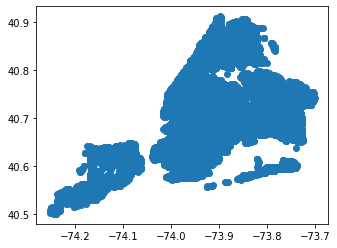

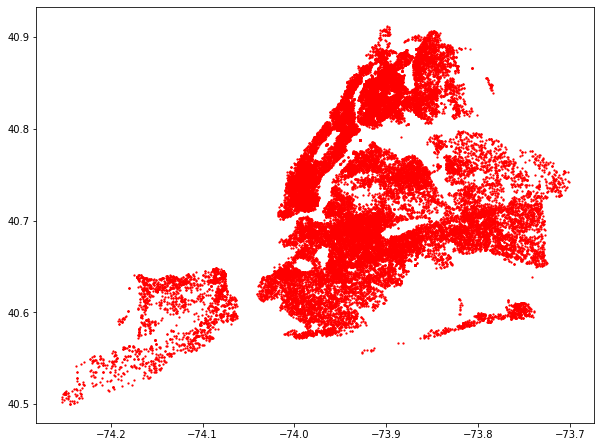

In [80]:
Outdoor_Crimes_gdf.plot()
fig, ax1 = plt.subplots(1,figsize=(10,10))
Outdoor_Crimes_gdf.plot(ax = ax1, color = 'red', markersize= 1.5)

In [21]:
ax = outside_crimes.plot(figsize=(20,5), markersize=0.5, color='pink', alpha=0.5)
ax.axis('off')

(-2542.4, 53390.4, -49999944.5, 1049998856.5)

ValueError: Date ordinal -49999944.5 converts to -134926-10-20T12:00:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

In [22]:
# Go into the crs to convert it...
# ignore the datum and spheroid,
outside_crimes.to_crs({'proj': 'merc'}).plot()

AttributeError: 'DataFrame' object has no attribute 'to_crs'

In [26]:
pip install seaborn

distutils: /Users/rachelbryn/opt/anaconda3/envs/geo_env/include/python3.9/UNKNOWN
sysconfig: /Users/rachelbryn/opt/anaconda3/envs/geo_env/include/python3.9
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 285 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 30.9 MB 15.5 MB/s eta 0:00:01    |█████▋                          | 5.5 MB 15.0 MB/s eta 0:00:02     |██████▍                         | 6.1 MB 15.0 MB/s eta 0:00:02
distutils: /Users/rachelbryn/opt/anaconda3/envs/geo_env/include/python3.9/UNKNOWN
sysconfig: /Users/rachelbryn/opt/anaconda3/envs/geo_env/include/python3.9
user = False
home = None
root = None
prefix = None
Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install scikit-learn scipy matplotlib

distutils: /Users/rachelbryn/opt/anaconda3/envs/geo_env/include/python3.9/UNKNOWN
sysconfig: /Users/rachelbryn/opt/anaconda3/envs/geo_env/include/python3.9
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 7.3 MB 3.6 MB/s eta 0:00:01     |███████████████████▊            | 4.5 MB 3.6 MB/s eta 0:00:01     |███████████████████████████████▎| 7.1 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 10.9 MB/s eta 0:00:01
distutils: /Users/rachelbryn/opt/anaconda3/envs/geo_env/include/python3.9/UNKNOWN
sysconfig: /Users/rachelbryn/opt/anaconda3/envs/geo_env/include/python3.9
user = False
home = None
root = None
prefix = None
Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

BELOW IS FROM https://github.com/geopandas/geopandas/blob/master/doc/source/gallery/plotting_basemap_background.ipynb

In [ ]:

## Let's use the NYC borough boundary data that is available
## in geopandas datasets. Plotting this gives the following result:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [41]:
## Convert the data to Web Mercator Web map tiles are typically provided in Web Mercator (EPSG 3857), 
## so we need to make sure to convert our data first to the same CRS to combine our polygons and background tiles in the same map:

df = df.to_crs(epsg=3857)

In [43]:
pip install contextily

distutils: /Users/rachelbryn/opt/anaconda3/envs/geo_env/include/python3.9/UNKNOWN
sysconfig: /Users/rachelbryn/opt/anaconda3/envs/geo_env/include/python3.9
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 20.5 MB 15.4 MB/s eta 0:00:01     |███████████████████████████     | 17.4 MB 13.6 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 7.6 MB/s  eta 0:00:01
     |████████████████████████████████| 112 kB 14.0 MB/s eta 0:00:01
     |████████████████████████████████| 178 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 153 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 13.2 MB/s eta 0:00:01
distutils: /Users/rachelbryn/opt/anaconda3/envs/geo_env/include/python3.9/UNKNOWN
sysconfig: /Users/rachelbryn/opt/anaconda3/envs/geo_env/include/python3.9
user = False
home = None
root = None
prefix = None
Note: you may need to restart the kernel to use updated packages.


In [44]:
import contextily as ctx

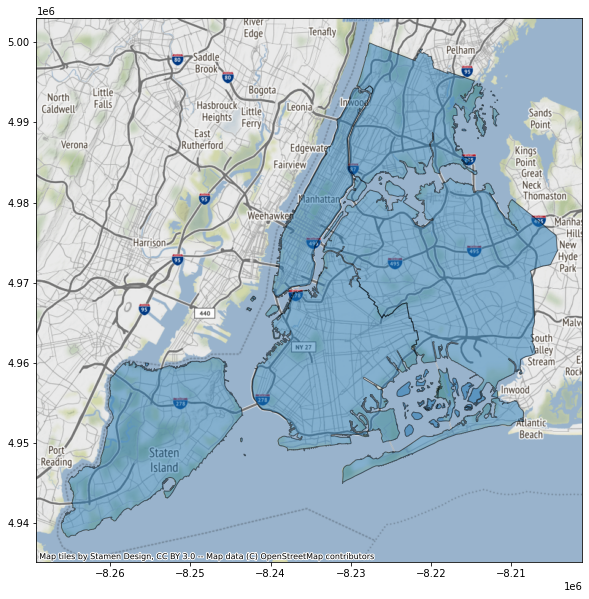

In [45]:
## We can use add_basemap function of contextily to easily add a background map to our plot.
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

In [46]:
crime_new.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,...,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,Lat_Lon,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,geometry
0,885776788,66,NaN,12/23/2020,19:50:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,NaN,NaN,12/23/2020,POINT (-73.99141682199996 40.62576896100006),986633,167258,40.625769,-73.991417,POINT (-73.99142 40.62577)
1,350637195,77,NaN,12/21/2020,01:10:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,NaN,NaN,12/21/2020,POINT (-73.93022154099998 40.67458330800008),1003606,185050,40.674583,-73.930222,POINT (-73.93022 40.67458)
2,347843168,43,BRONX,11/22/2020,22:00:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,...,157.0,RAPE 1,STREET,11/23/2020,POINT (-73.86969046099993 40.82310129900002),1020316,239179,40.823101,-73.869690,POINT (-73.86969 40.82310)
3,197941396,47,NaN,11/22/2020,09:50:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,NaN,NaN,11/22/2020,POINT (-73.84760778699997 40.88745131300004),1026387,262634,40.887451,-73.847608,POINT (-73.84761 40.88745)
4,298404927,25,NaN,11/21/2020,15:38:00,NaN,NaN,COMPLETED,NaN,N.Y. HOUSING POLICE,...,NaN,NaN,NaN,11/21/2020,POINT (-73.93084834199995 40.80022202900005),1003396,230824,40.800222,-73.930848,POINT (-73.93085 40.80022)


In [50]:
sns.kdeplot(lst['Longitude'], lst['Latitude'], shade=True, cmap='viridis');

NameError: name 'lst' is not defined